In [5]:
import glob
import os

import mini_ataqc
import matplotlib
%matplotlib inline
matplotlib.use('Agg')

In [6]:
QCPLOTS_DIR = 'qc_plots/'

DATA_DIR = '/srv/scratch/training_camp/data/tc2017/analysis/aligned'
SAMPLE_DIRS = glob.glob(os.path.join(DATA_DIR, '*'))
SAMPLE_NAMES = list(map(os.path.basename, SAMPLE_DIRS))

TSS_FILE = 'sacCer3_Ensemble_TSS.bed'
CHR_SIZES = '/srv/scratch/training_camp/saccer3/sacCer3.chrom.sizes'

READ_LEN = 77

In [7]:
SAMPLE_NAMES

['whi5-SCE-Rep1_R1_001.trimmed.sorted.bam.bai',
 'cln3-SCE-0_6MNaCl-Rep1_R1_001.trimmed.sorted.bam',
 'cln3-SCE-0_6MNaCl-Rep2_R1_001.trimmed.bam',
 'WT-SCE-Rep2_R1_001.trimmed.nodup.bam.bai',
 'WT-SCD-Rep2_R1_001.trimmed.nodup.bam',
 'WT-SCE-Rep2_R1_001.trimmed.nodup.bam',
 'cln3-SCE-Rep1_R1_001.trimmed.bam',
 'WT-SCD-0_6MNaCl-Rep2_R1_001.trimmed.sorted.dup.bam.bai',
 'whi5-cln3-SCE-Rep1_R1_001.trimmed.sorted.dup.bam',
 'cln3-SCE-Rep1_R1_001.trimmed.nodup.bam',
 'whi5-SCE-Rep2_R1_001.trimmed.sorted.dup.bam.bai',
 'whi5-cln3-SCE-Rep2_R1_001.trimmed.sorted.bam',
 'cln3-SCD-0_6MNaCl-Rep2_R1_001.trimmed.sorted.dup.bam.bai',
 'whi5-cln3-SCE-Rep2_R1_001.trimmed.sorted.dup.bam',
 'cln3-SCD-0_6MNaCl-Rep2_R1_001.trimmed.sorted.bam',
 'cln3-SCD-Rep1_R1_001.trimmed.sorted.dup.bam.bai',
 'WT-SCD-Rep2_R1_001.trimmed.sorted.bam',
 'cln3-SCE-Rep1_R1_001.trimmed.sorted.dup.bam.bai',
 'WT-SCE-Rep1_R1_001.trimmed.nodup.bam.bai',
 'whi5-cln3-SCE-Rep2_R1_001.trimmed.bam',
 'whi5-cln3-SCE-Rep2_R1_001.trimm

Running vplot for sample WT-SCD-Rep2
Running insert metrics for sample WT-SCD-Rep2
Running vplot for sample WT-SCE-Rep2
Running insert metrics for sample WT-SCE-Rep2
Running vplot for sample cln3-SCE-Rep1
Running insert metrics for sample cln3-SCE-Rep1
Running vplot for sample WT-SCE-0
Running insert metrics for sample WT-SCE-0
Running vplot for sample whi5-cln3-SCE-Rep2
Running insert metrics for sample whi5-cln3-SCE-Rep2
Running vplot for sample cln3-SCD-Rep2
Running insert metrics for sample cln3-SCD-Rep2
Running vplot for sample cln3-SCD-0
Running insert metrics for sample cln3-SCD-0
Running vplot for sample WT-SCE-0
Running insert metrics for sample WT-SCE-0
Running vplot for sample cln3-SCD-0
Running insert metrics for sample cln3-SCD-0
Running vplot for sample WT-SCE-Rep1
Running insert metrics for sample WT-SCE-Rep1
Running vplot for sample WT-SCD-0


/opt/conda/envs/py2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Running insert metrics for sample WT-SCD-0
Running vplot for sample cln3-SCE-Rep2
Running insert metrics for sample cln3-SCE-Rep2
Running vplot for sample cln3-SCE-0
Running insert metrics for sample cln3-SCE-0
Running vplot for sample whi5-SCE-Rep1
Running insert metrics for sample whi5-SCE-Rep1
Running vplot for sample cln3-SCE-0
Running insert metrics for sample cln3-SCE-0
Running vplot for sample whi5-SCE-Rep2
Running insert metrics for sample whi5-SCE-Rep2
Running vplot for sample WT-SCD-0
Running insert metrics for sample WT-SCD-0
Running vplot for sample cln3-SCD-Rep1
Running insert metrics for sample cln3-SCD-Rep1
Running vplot for sample WT-SCD-Rep1
Running insert metrics for sample WT-SCD-Rep1
Running vplot for sample whi5-cln3-SCE-Rep1
Running insert metrics for sample whi5-cln3-SCE-Rep1


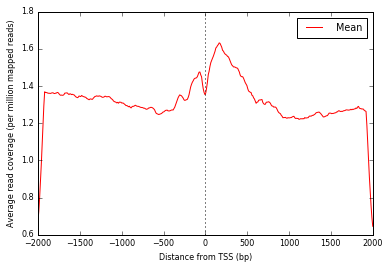

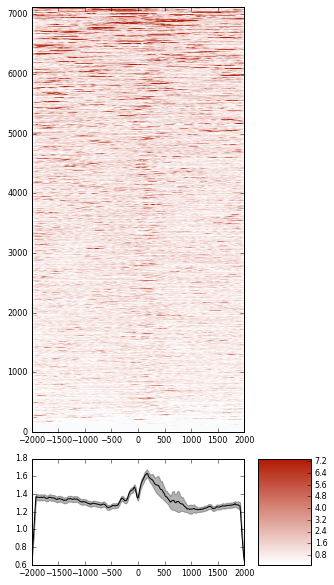

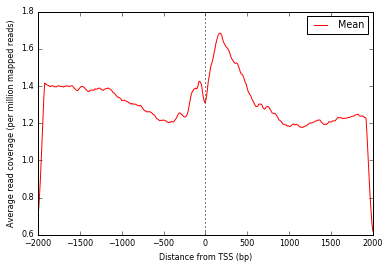

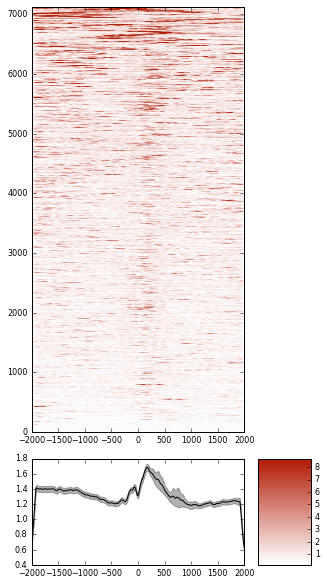

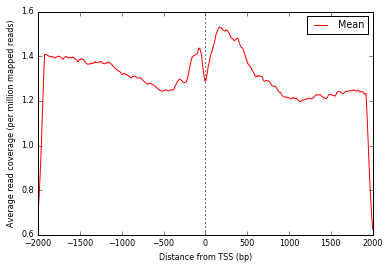

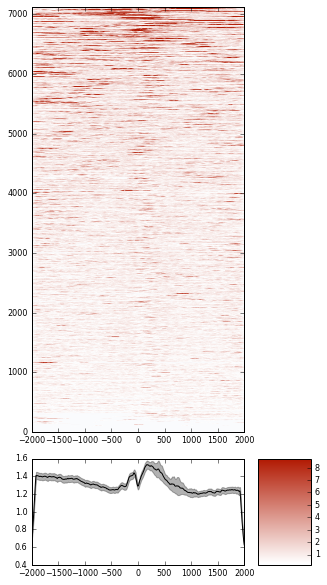

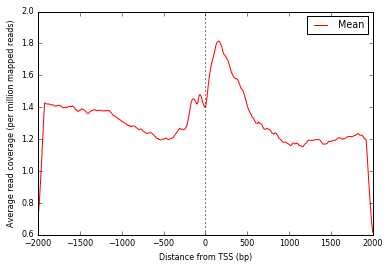

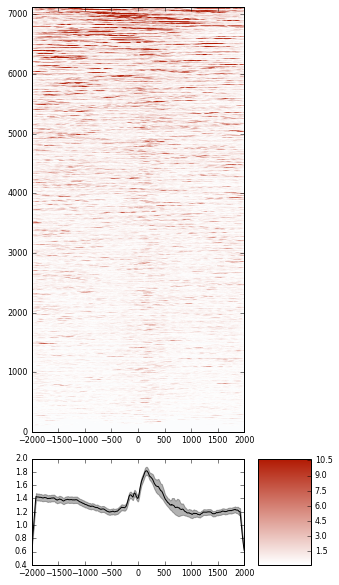

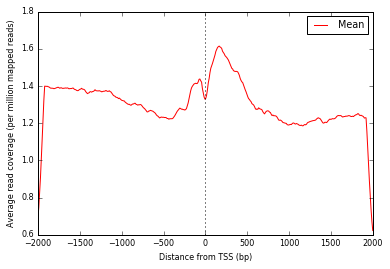

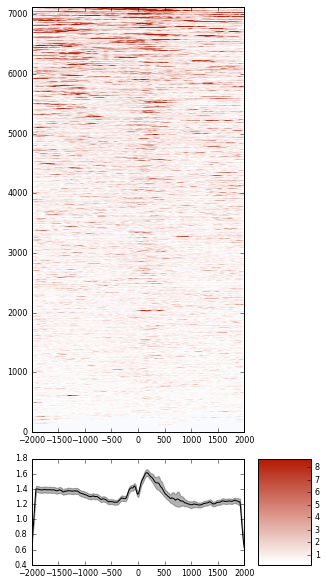

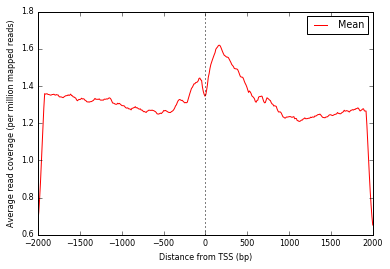

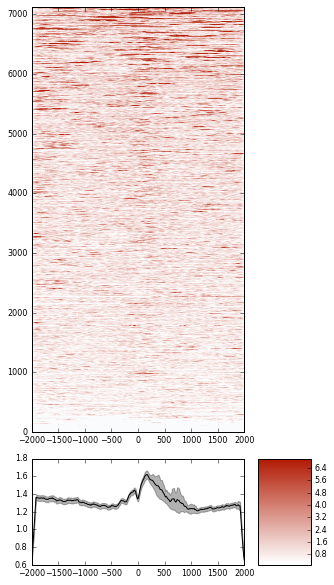

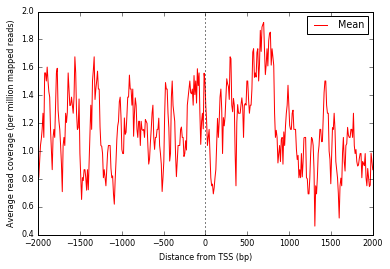

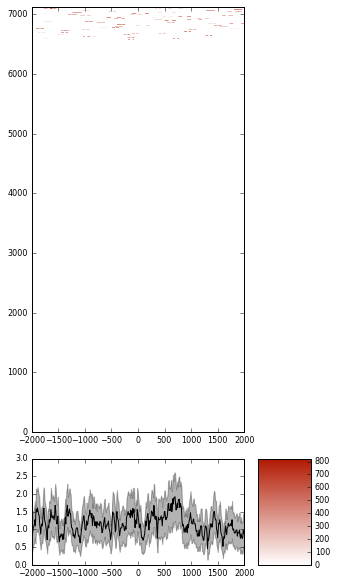

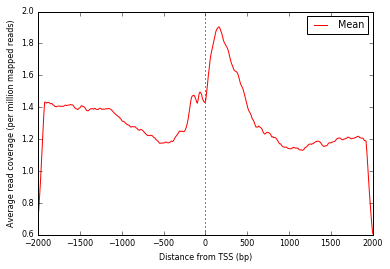

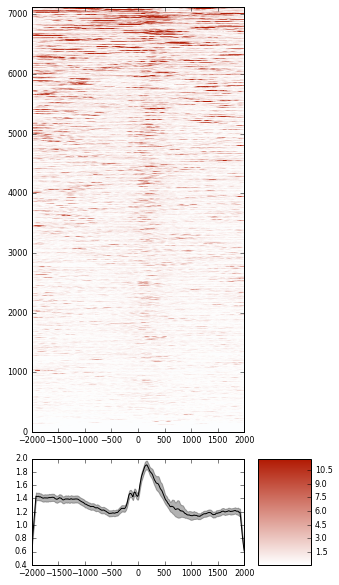

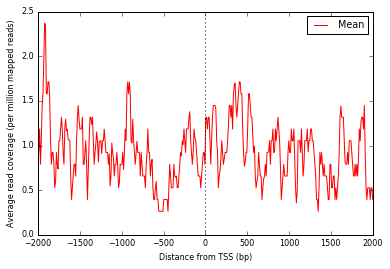

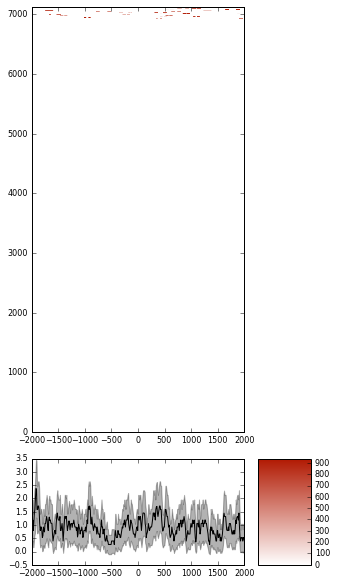

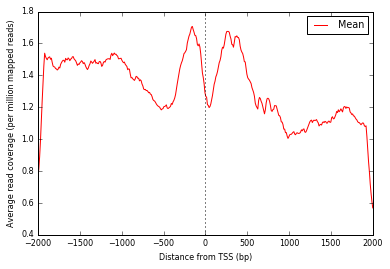

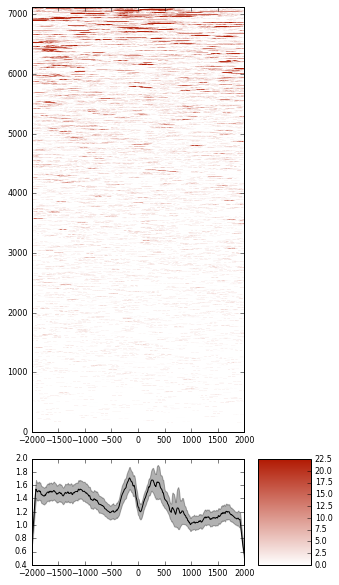

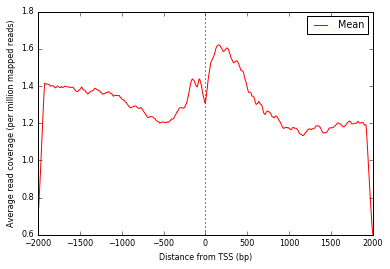

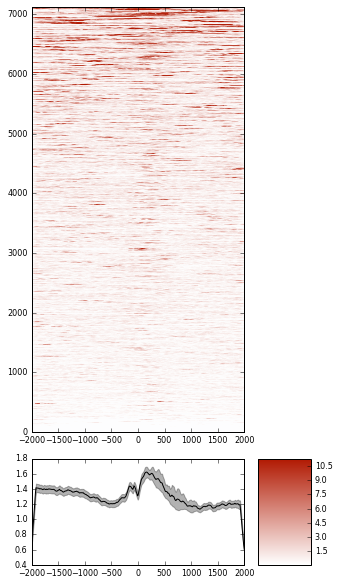

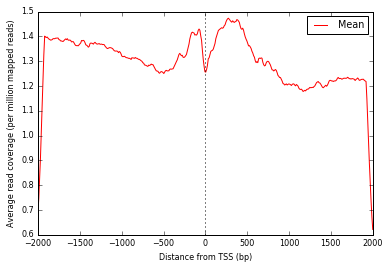

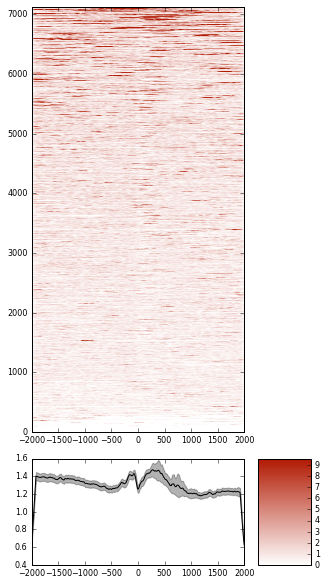

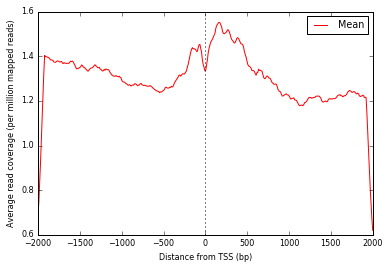

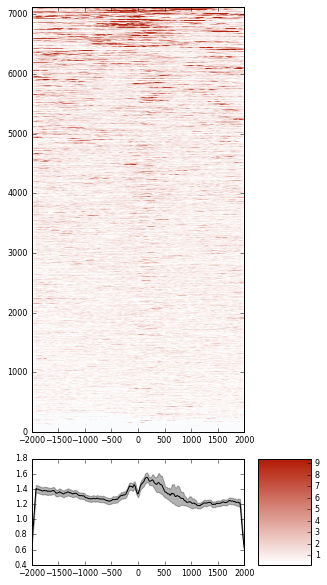

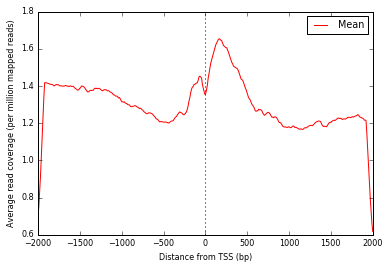

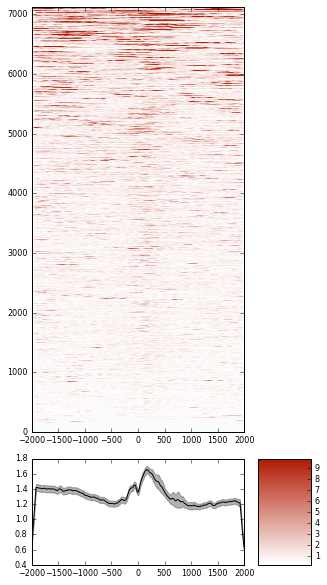

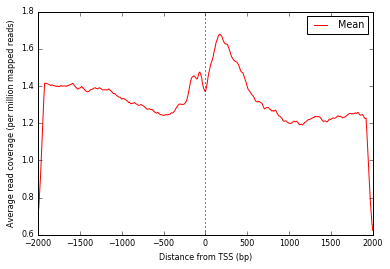

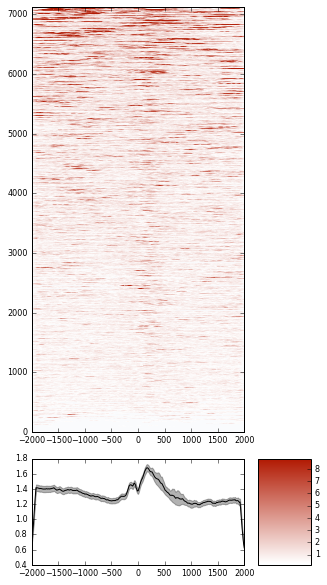

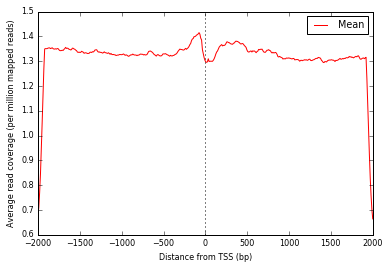

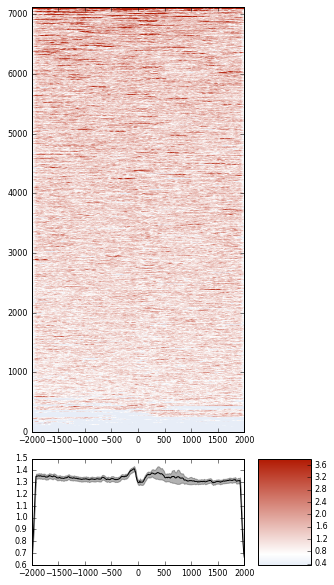

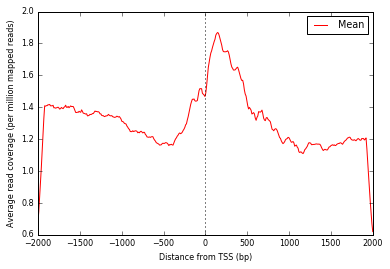

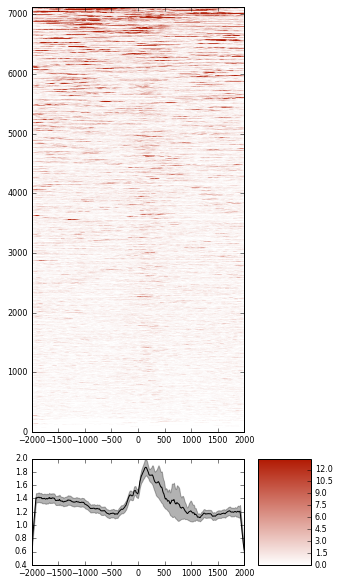

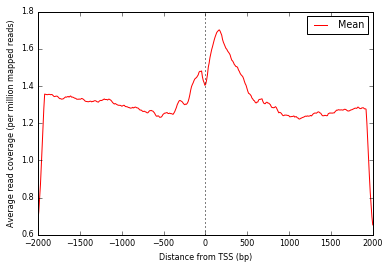

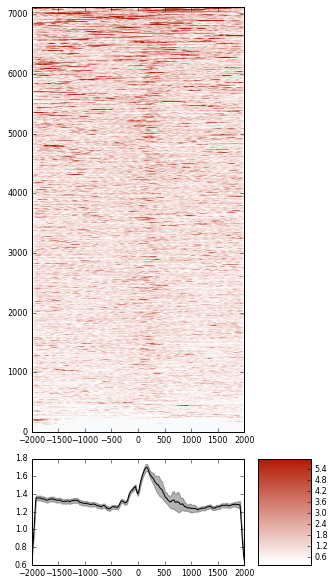

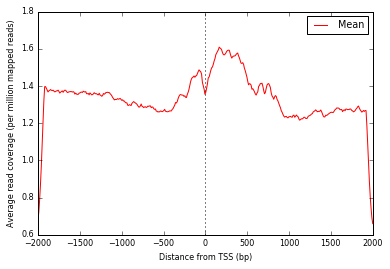

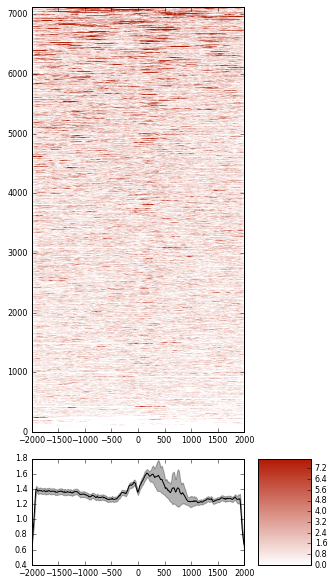

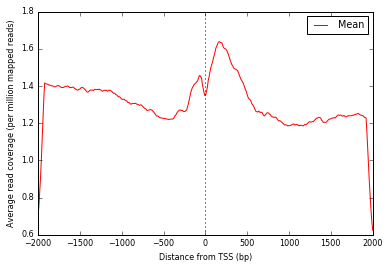

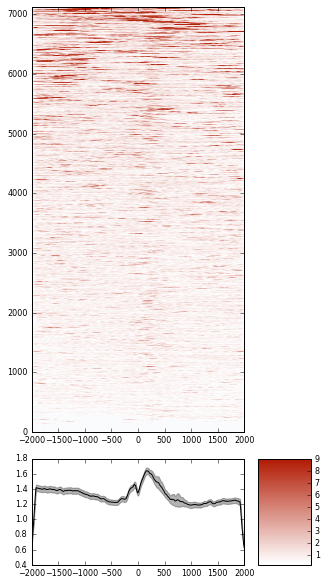

In [8]:
final_bams = glob.glob(os.path.join(DATA_DIR, '*nodup.bam'))

for final_bam in final_bams:
    
    fname_prefix = os.path.basename(final_bam).split('_')[0]
    output_prefix = os.path.join(QCPLOTS_DIR, fname_prefix)
    
    print('Running vplot for sample {}'.format(fname_prefix))
    
    mini_ataqc.make_vplot(final_bam, TSS_FILE, output_prefix, CHR_SIZES, READ_LEN, bins=400, bp_edge=2000,
               processes=8, greenleaf_norm=True)
    
    print('Running insert metrics for sample {}'.format(fname_prefix))
    
    mini_ataqc.get_insert_distribution(final_bam, output_prefix)